<a href="https://colab.research.google.com/github/CUNY-SPS-Data-Science-Program/your-bio-mianshariq/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

# Step 1: Access CDC Firearm Mortality Data via API
# Define the API URL
api_url = pd.read_csv("https://github.com/mianshariq/Datasets/raw/b87e67058554eadc8528dbcc65a342c2a2542f42/data-table.csv")
api_url.head()
law_grades = pd.read_csv("https://github.com/mianshariq/Datasets/raw/e22e9dd34b89fa6efc689faead30d99bc6a6e776/Grade.csv")
law_grades=law_grades.rename(columns={'State': 'FULL_NAME'})
api_url=api_url.merge(law_grades, on='FULL_NAME', how='left')
data=gpd.read_file('https://github.com/mianshariq/Datasets/raw/dd792f49b511bdb836371df436cdb05b5730667a/gz_2010_us_040_00_500k_V2.json')
data=data.rename(columns={'NAME': 'FULL_NAME'})
df=api_url.merge(data, on='FULL_NAME', how='left')


In [ ]:
df.head()

,YEAR,STATE_x,RATE,DEATHS,FULL_NAME,Gun_Law_Strength_Rank,Grade,Gun_Deaths_Ranked,Death_per_100K,GEO_ID,STATE_y,LSAD,CENSUSAREA,geometry
0,2021,AL,26.4,1315,Alabama,38,F,4,26.4,0400000US01,01,,50645.326,"MULTIPOLYGON (((-85.00237 31.00068, -85.02411 ..."
1,2021,AK,25.2,182,Alaska,41,F,6,25.2,0400000US02,02,,570640.950,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377..."
2,2021,AZ,18.3,1365,Arizona,42,F,17,18.3,0400000US04,04,,113594.084,"POLYGON ((-109.04522 36.99908, -109.04524 36.9..."
3,2021,AR,23.3,698,Arkansas,50,F,8,23.3,0400000US05,05,,52035.477,"POLYGON ((-94.55929 36.49950, -94.51948 36.499..."
4,2021,CA,9.0,3576,California,1,A,43,9.0,0400000US06,06,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385..."


In [ ]:
df=df[df['YEAR']== 2021]

In [ ]:
likert_categories = {
    'A': 'Very Strict',
    'A-': 'Very Strict',
    'B+': 'Strict',
    'B': 'Strict',
    'B-': 'Strict',
    'C+': 'Moderate',
    'C': 'Moderate',
    'C-': 'Moderate',
    'D+': 'Lax',
    'F': 'Very Lax'
}

# Map the Likert scale categories to the 'Grade' column
df['Gun_Control_Category'] = df['Grade'].map(likert_categories)

In [ ]:
df.head()

,YEAR,STATE_x,RATE,DEATHS,FULL_NAME,Gun_Law_Strength_Rank,Grade,Gun_Deaths_Ranked,Death_per_100K,GEO_ID,STATE_y,LSAD,CENSUSAREA,geometry,Gun_Control_Category
0,2021,AL,26.4,1315,Alabama,38,F,4,26.4,0400000US01,01,,50645.326,"MULTIPOLYGON (((-85.00237 31.00068, -85.02411 ...",Very Lax
1,2021,AK,25.2,182,Alaska,41,F,6,25.2,0400000US02,02,,570640.950,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377...",Very Lax
2,2021,AZ,18.3,1365,Arizona,42,F,17,18.3,0400000US04,04,,113594.084,"POLYGON ((-109.04522 36.99908, -109.04524 36.9...",Very Lax
3,2021,AR,23.3,698,Arkansas,50,F,8,23.3,0400000US05,05,,52035.477,"POLYGON ((-94.55929 36.49950, -94.51948 36.499...",Very Lax
4,2021,CA,9.0,3576,California,1,A,43,9.0,0400000US06,06,,155779.220,"MULTIPOLYGON (((-122.44632 37.86105, -122.4385...",Very Strict


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
heatmap_data = df.groupby('Gun_Control_Category')['Death_per_100K'].agg(['mean'])



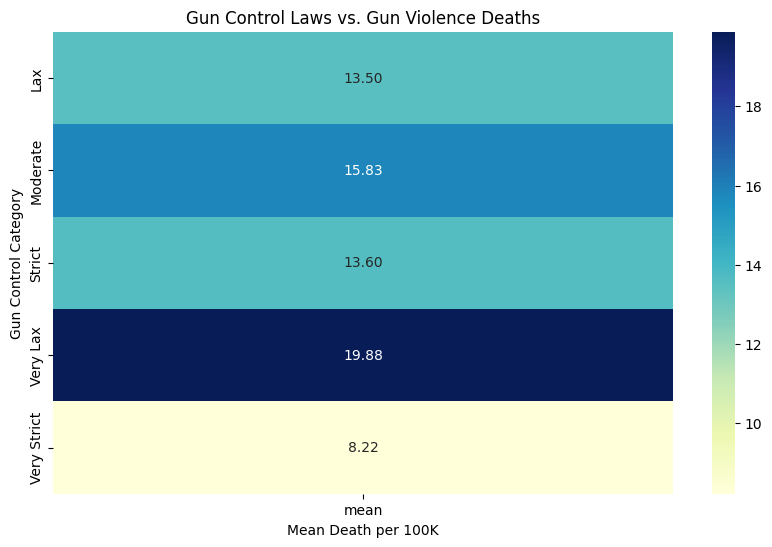

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Gun Control Laws vs. Gun Violence Deaths')
plt.xlabel('Mean Death per 100K')
plt.ylabel('Gun Control Category')

plt.show()


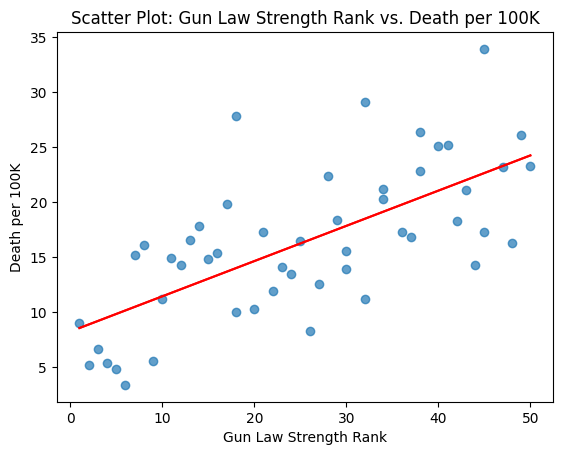

In [ ]:
plt.scatter(df['Gun_Law_Strength_Rank'], df['Death_per_100K'], alpha=0.7)
plt.xlabel('Gun Law Strength Rank')
plt.ylabel('Death per 100K')
plt.title('Scatter Plot: Gun Law Strength Rank vs. Death per 100K')
slope, intercept = np.polyfit(df['Gun_Law_Strength_Rank'], df['Death_per_100K'], 1)

# Create x-values for the lm line
x_values = np.linspace(min(df['Gun_Law_Strength_Rank']), max(df['Gun_Law_Strength_Rank']), 100)

# Calculate corresponding y-values for the lm line
y_values = slope * x_values + intercept

# Plot the lm line
plt.plot(x_values, y_values, color='red', label='Linear Regression Line')
# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Trendline')
